<a href="https://colab.research.google.com/github/Saumya0330/Saumya-USC420/blob/main/Cog_Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cognitive Lab Assignment 7

Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data,
clean and process it, perform statistical analysis, and generate visual insights to help the
business make informed decisions.

1. Use your roll number as the random seed to generate unique data for each student.

In [5]:
import random

random.seed(102317028)
for i in range(0,10):
  print(random.randint(0,100))

3
13
64
44
73
71
10
61
79
52


Part I: Randomized Sales Data Generation (NumPy)
1. Initialize Random Seed
2. Generate Sales Data
3. Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
where each column represents a product category:
4. Electronics, Clothing, Home & Kitchen, Sports.
5. Sales values should be between 1000 and 5000 units per month.
6. The range should be randomized using the seed.

In [13]:
import numpy as np

np.random.seed(0)
min_sales=np.random.randint(500,1500)
max_sales=np.random.randint(4500,5500)
print('randomized range: ',min_sales,' to ', max_sales)
sales_data=np.random.randint(min_sales,max_sales+1, size=(12,4))
print('sales data:\n')
print(sales_data)

randomized range:  1184  to  5059
sales data:

[[2837 4448 2019 1947]
 [2915 4615 2217 4979]
 [1461 2962 3012 3831]
 [4326 4728 3832 4652]
 [3546 1889 4742 3783]
 [3319 3406 4856 4081]
 [2885 1721 4077 3304]
 [4009 3124 3347 2160]
 [1939 4965 3230 3055]
 [4687 3680 4082 1283]
 [3192 4433 1939 1981]
 [1843 4403 4142 1607]]


3. Convert to DataFrame
 Convert the cleaned NumPy array into a Pandas DataFrame with:
i. Columns: Electronics, Clothing, Home & Kitchen, Sports
ii. Index: Months from Jan to Dec

In [14]:
import pandas as pd

categories = ["Electronics", "Clothing", "Home & Kitchen", "Sports"]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sales_df=pd.DataFrame(sales_data, columns=categories, index=months)
print(sales_df)

     Electronics  Clothing  Home & Kitchen  Sports
Jan         2837      4448            2019    1947
Feb         2915      4615            2217    4979
Mar         1461      2962            3012    3831
Apr         4326      4728            3832    4652
May         3546      1889            4742    3783
Jun         3319      3406            4856    4081
Jul         2885      1721            4077    3304
Aug         4009      3124            3347    2160
Sep         1939      4965            3230    3055
Oct         4687      3680            4082    1283
Nov         3192      4433            1939    1981
Dec         1843      4403            4142    1607


Part II: Data Manipulation and Analysis (Pandas)

1. Display the first 5 rows and summary statistics of the DataFrame.

In [19]:
print('first 5 rows:\n')
sales_df.head()

first 5 rows:



,Electronics,Clothing,Home & Kitchen,Sports
Jan,2837,4448,2019,1947
Feb,2915,4615,2217,4979
Mar,1461,2962,3012,3831
Apr,4326,4728,3832,4652
May,3546,1889,4742,3783


In [20]:
print('summary statistics:\n')
sales_df.describe()

summary statistics:



,Electronics,Clothing,Home & Kitchen,Sports
count,12.000000,12.000000,12.000000,12.000000
mean,3079.916667,3697.833333,3457.916667,3055.250000
std,993.722886,1097.294096,1007.459131,1240.156671
min,1461.000000,1721.000000,1939.000000,1283.000000
25%,2612.500000,3083.500000,2813.250000,1972.500000
50%,3053.500000,4041.500000,3589.500000,3179.500000
75%,3661.750000,4489.750000,4097.000000,3893.500000
max,4687.000000,4965.000000,4856.000000,4979.000000


2. Calculate the total sales per category and total sales per month.

In [22]:
category_totals=sales_df.sum(axis=0)
print('total sales per category:')
print(category_totals,'\n')

monthly_totals=sales_df.sum(axis=1)
print('total sales per month:')
print(monthly_totals)

total sales per category:
Electronics       36959
Clothing          44374
Home & Kitchen    41495
Sports            36663
dtype: int64 

total sales per month:
Jan    11251
Feb    14726
Mar    11266
Apr    17538
May    13960
Jun    15662
Jul    11987
Aug    12640
Sep    13189
Oct    13732
Nov    11545
Dec    11995
dtype: int64


3. Calculate the average sales growth between consecutive months for each category.

In [26]:
monthly_growth= sales_df.pct_change().dropna()*100
print('monthly growth for each category: \n')
print(monthly_growth)
avg_growth=monthly_growth.mean()
print('\naverage sales growth between consecutive months for each category:\n')
print(avg_growth)

monthly growth for each category: 

     Electronics   Clothing  Home & Kitchen      Sports
Feb     2.749383   3.754496        9.806835  155.726759
Mar   -49.879931 -35.817985       35.859269  -23.056839
Apr   196.098563  59.621877       27.224436   21.430436
May   -18.030513 -60.046531       23.747390  -18.680138
Jun    -6.401579  80.307041        2.404049    7.877346
Jul   -13.076228 -49.471521      -16.042010  -19.039451
Aug    38.960139  81.522371      -17.905323  -34.624697
Sep   -51.633824  58.930858       -3.495668   41.435185
Oct   141.722537 -25.881168       26.377709  -58.003273
Nov   -31.896736  20.461957      -52.498775   54.403741
Dec   -42.261905  -0.676743      113.615266  -18.879354

average sales growth between consecutive months for each category:

Electronics       15.122719
Clothing          12.064059
Home & Kitchen    13.553925
Sports             9.871792
dtype: float64


4. Add the following columns to the DataFrame:
 Total Sales: Sum of all categories per month.
 Growth Rate: Percentage change in Total Sales from the previous month.

In [31]:
sales_df['Total Sales']= sales_df.sum(axis=1)
sales_df['Growth Rate']= sales_df['Total Sales'].pct_change().fillna(0)*100
print(sales_df.round(2))

     Electronics  Clothing  Home & Kitchen  Sports  Total Sales  Growth Rate
Jan         2837      4448            2019    1947     56255.00         0.00
Feb         2915      4615            2217    4979     73691.84        31.00
Mar         1461      2962            3012    3831     56282.93       -23.62
Apr         4326      4728            3832    4652     87801.55        56.00
May         3546      1889            4742    3783     69759.10       -20.55
Jun         3319      3406            4856    4081     78334.45        12.29
Jul         2885      1721            4077    3304     59888.02       -23.55
Aug         4009      3124            3347    2160     63210.96         5.55
Sep         1939      4965            3230    3055     65953.68         4.34
Oct         4687      3680            4082    1283     68668.23         4.12
Nov         3192      4433            1939    1981     57693.11       -15.98
Dec         1843      4403            4142    1607     59982.84         3.97

5. Apply a randomized discount:
If your roll number is even, apply a 10% discount to the Electronics category.
If odd, apply a 15% discount to the Clothing category.

In [35]:
#Roll no= 102317028 (even)
sales_df['Electronics']*=0.9  #10% discount
sales_df['Total Sales']=sales_df.sum(axis=1)
sales_df['Growth Rate']= sales_df['Total Sales'].pct_change().fillna(0)*100
print('sales data after applied discount:\n')
print(sales_df.round(2))

sales data after applied discount:

     Electronics  Clothing  Home & Kitchen  Sports  Total Sales  Growth Rate
Jan      1861.36      4448            2019    1947     98691.80         0.00
Feb      1912.53      4615            2217    4979    130082.61        31.57
Mar       958.56      2962            3012    3831     99930.67       -23.33
Apr      2838.29      4728            3832    4652    154261.85        54.90
May      2326.53      1889            4742    3783    122308.00       -20.68
Jun      2177.60      3406            4856    4081    138028.65        12.69
Jul      1892.85      1721            4077    3304    105130.98       -23.75
Aug      2630.30      3124            3347    2160    110164.89         5.03
Sep      1272.18      4965            3230    3055    116973.71         5.61
Oct      3075.14      3680            4082    1283    119370.00         2.68
Nov      2094.27      4433            1939    1981    100921.10       -15.63
Dec      1209.19      4403            41

Part III: Visualizations (Matplotlib and Seaborn)

1. Plot monthly sales trends for each category using line plots.

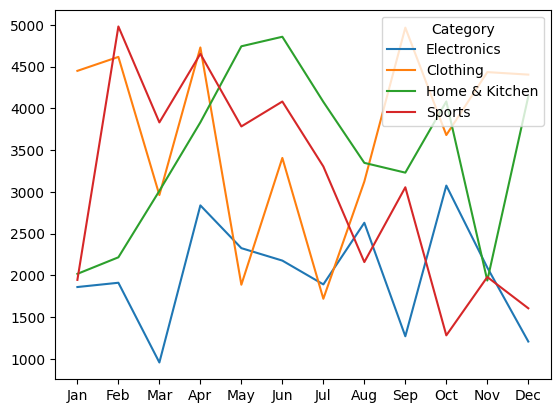

In [40]:
import matplotlib.pyplot as plt

for category in categories:
  plt.plot(months, sales_df[category], label=category)
plt.legend(title="Category", loc="upper right")
plt.show()

2. Create the following plots:
Box plots to show the sales distribution for each category.

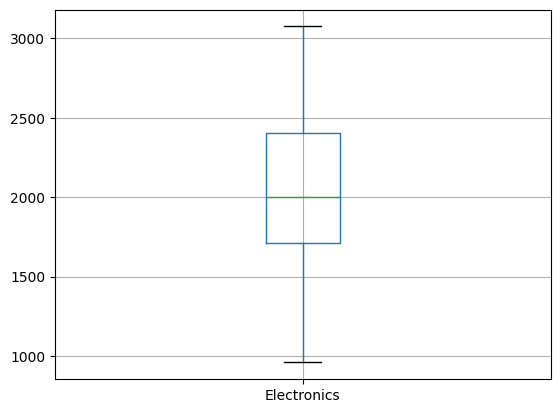

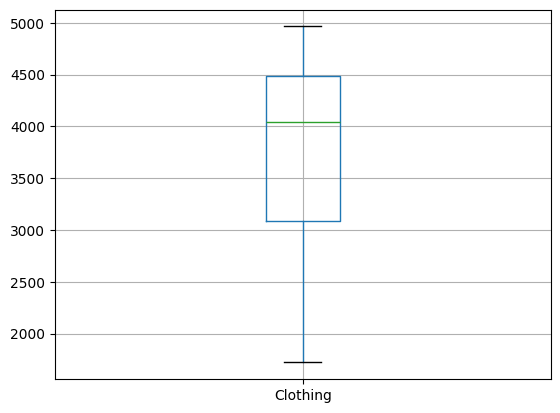

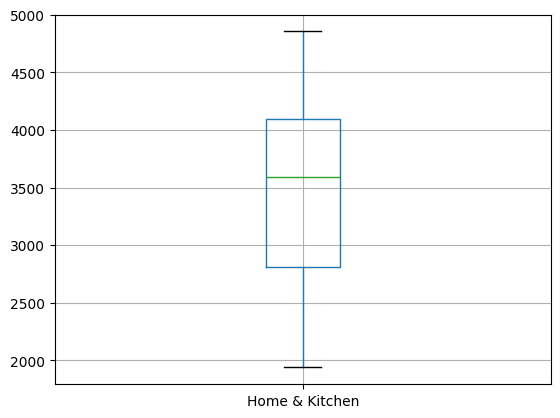

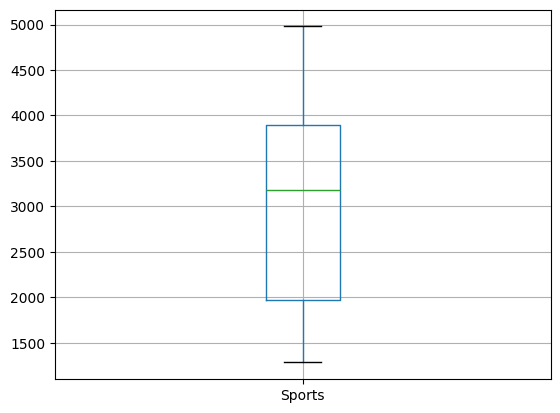

In [47]:
for category in categories:
  sales_df.boxplot(column=category)
  plt.show()

Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])
i. Find element-wise absolute value
ii. Find the 25th, 50th, and 75th percentile of flattened array, for each column, for each
row.
iii. Mean, Median and Standard Deviation of flattened array, of each column, and
each row

In [10]:
import numpy as np

arr= np.array([[1,-2,3],[-4,5,-6]])
abs_arr=abs(arr)
print('i. element wise absolute values are:')
print(abs_arr)

percentile_flattened= np.percentile(arr, [20,50,75])
print("\nii. Percentiles of flattened array (25th, 50th, 75th):", percentile_flattened)
percentile_column= np.percentile(arr, [20,50,75], axis=0)
print("\nPercentiles for each column:\n", percentile_column)
percentile_row= np.percentile(arr, [20,50,75], axis=1)
print("\nPercentiles for each row:\n", percentile_row)

mean_flattened = np.mean(arr)
median_flattened = np.median(arr)
std_flattened = np.std(arr)
print("\niii. Flattened array stats - Mean:", mean_flattened, ", Median:", median_flattened, ", Std Dev:", std_flattened)
mean_columns = np.mean(arr, axis=0)
median_columns = np.median(arr, axis=0)
std_columns = np.std(arr, axis=0)
print("\nColumn-wise stats:")
print("Mean:", mean_columns)
print("Median:", median_columns)
print("Std Dev:", std_columns)
mean_rows = np.mean(arr, axis=1)
median_rows = np.median(arr, axis=1)
std_rows = np.std(arr, axis=1)
print("\nRow-wise stats:")
print("Mean:", mean_rows)
print("Median:", median_rows)
print("Std Dev:", std_rows)

i. element wise absolute values are:
[[1 2 3]
 [4 5 6]]

ii. Percentiles of flattened array (25th, 50th, 75th): [-4.  -0.5  2.5]

Percentiles for each column:
 [[-3.   -0.6  -4.2 ]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]

Percentiles for each row:
 [[-0.8 -5.2]
 [ 1.  -4. ]
 [ 2.   0.5]]

iii. Flattened array stats - Mean: -0.5 , Median: -0.5 , Std Dev: 3.8622100754188224

Column-wise stats:
Mean: [-1.5  1.5 -1.5]
Median: [-1.5  1.5 -1.5]
Std Dev: [2.5 3.5 4.5]

Row-wise stats:
Mean: [ 0.66666667 -1.66666667]
Median: [ 1. -4.]
Std Dev: [2.05480467 4.78423336]


Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).
i. Find floor, ceiling and truncated value, rounded values

In [13]:
a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])

floor_values = np.floor(a)
print("Floor values:", floor_values)

ceiling_values = np.ceil(a)
print("Ceiling values:", ceiling_values)

truncated_values = np.trunc(a)
print("Truncated values:", truncated_values)

rounded_values = np.round(a)
print("Rounded values:", rounded_values)

Floor values: [-2. -2. -1.  0.  1.  1.  3.]
Ceiling values: [-1. -1. -0.  1.  2.  2.  3.]
Truncated values: [-1. -1. -0.  0.  1.  1.  3.]
Rounded values: [-2. -2. -0.  0.  2.  2.  3.]


Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.

In [16]:
my_list = [10, 20, 30, 40, 50]
index1, index2 = 1, 3
temp = my_list[index1]
my_list[index1] = my_list[index2]
my_list[index2] = temp
print("List after swapping:", my_list)


List after swapping: [10, 40, 30, 20, 50]


Q.5 Write a Python program to swap two elements in a set by converting it to a list first.

In [18]:
my_set = {10, 20, 30, 40, 50}

elem1, elem2 = 20, 50

my_list = list(my_set)

if elem1 in my_list and elem2 in my_list:
    index1, index2 = my_list.index(elem1), my_list.index(elem2)
    my_list[index1], my_list[index2] = my_list[index2], my_list[index1]

    swapped_set = set(my_list)

    print("Set after swapping:", swapped_set)
else:
    print("One or both elements not found in the set.")

Set after swapping: {40, 10, 50, 20, 30}
